# 1. 正弦波

## Tensorflow

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4624
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3339
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2873
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1158
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0236
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0013
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0010
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.2293e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


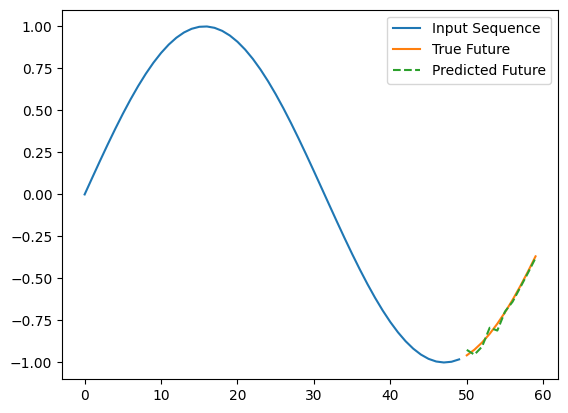

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# データ作成
def create_sin_data(seq_length=50, num_samples=1000):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x)
    X, Y = [], []
    for i in range(len(y) - seq_length - 10):  # 未来10ステップを予測
        X.append(y[i:i+seq_length])
        Y.append(y[i+seq_length:i+seq_length+10])
    return np.array(X), np.array(Y)

seq_length = 50
X, Y = create_sin_data(seq_length)
X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, timesteps, features)

# モデル構築
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(10)  # 未来10ステップを予測
])
model.compile(optimizer='adam', loss='mse')

# 学習
model.fit(X, Y, epochs=10, batch_size=32, verbose=1)

# 予測
pred = model.predict(X[:1])

# 結果表示
plt.plot(range(50), X[0].flatten(), label="Input Sequence")
plt.plot(range(50, 60), Y[0], label="True Future")
plt.plot(range(50, 60), pred.flatten(), label="Predicted Future", linestyle='dashed')
plt.legend()
plt.show()


## Pytorch

Epoch 1, Loss: 0.5077
Epoch 2, Loss: 0.4967
Epoch 3, Loss: 0.4871
Epoch 4, Loss: 0.4754
Epoch 5, Loss: 0.4584
Epoch 6, Loss: 0.4362
Epoch 7, Loss: 0.4131
Epoch 8, Loss: 0.3796
Epoch 9, Loss: 0.3368
Epoch 10, Loss: 0.2885
Epoch 11, Loss: 0.2349
Epoch 12, Loss: 0.1739
Epoch 13, Loss: 0.1176
Epoch 14, Loss: 0.1102
Epoch 15, Loss: 0.1158


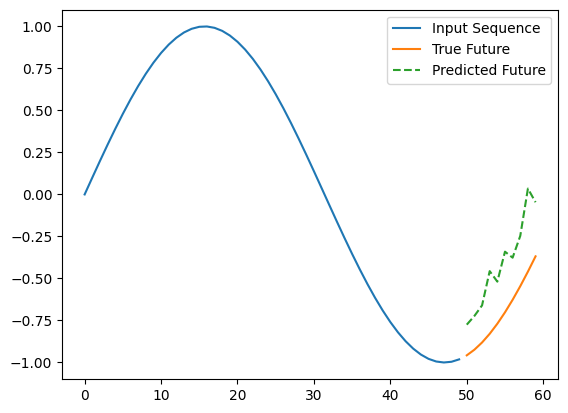

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# データ作成
def create_sin_data(seq_length=50, num_samples=1000):
    x = np.linspace(0, 100, num_samples)
    y = np.sin(x)
    X, Y = [], []
    for i in range(len(y) - seq_length - 10):
        X.append(y[i:i+seq_length])
        Y.append(y[i+seq_length:i+seq_length+10])
    return np.array(X), np.array(Y)

seq_length = 50
X, Y = create_sin_data(seq_length)
X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # (samples, timesteps, features)
Y = torch.tensor(Y, dtype=torch.float32)

# LSTMモデル
class LSTMModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=50, num_layers=2, output_dim=10):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # 最後のステップの出力を使う
        return out

# モデル初期化
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# 学習
for epoch in range(15):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# 予測
with torch.no_grad():
    pred = model(X[:1]).numpy()

# 結果表示
plt.plot(range(50), X[0].numpy().flatten(), label="Input Sequence")
plt.plot(range(50, 60), Y[0].numpy(), label="True Future")
plt.plot(range(50, 60), pred.flatten(), label="Predicted Future", linestyle='dashed')
plt.legend()
plt.show()


# 2. Flight

In [11]:
import seaborn as sns

# seabornのflightsデータセットをロード
flights = sns.load_dataset('flights')

# 最初の数行を表示
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


## Tendorflow

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 113190.3047
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92300.2344
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72142.6875
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 61387.3047
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49152.7500
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42499.8516
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37845.0938
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27569.0938
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24311.7695
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21947.6758
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19879.4863
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22351.8086
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21063.8945
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18736.7969
Epoch 15/50
15/15 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


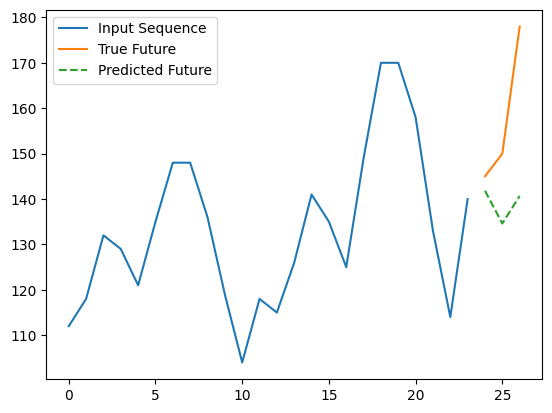

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_data(x, y, time_step = 3):
    X = []
    Y = []
    for i in range((len(y)-24-time_step)):
        X.append(y[i:i+24])
        Y.append(y[i+24:i+24+time_step])
    return np.array(X), np.array(Y)

x = flights.iloc[:,:2]
y = flights.iloc[:,2]
X, Y = create_data(x, y)
X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, timesteps, features)

model = Sequential([
    LSTM(24, activation='relu', input_shape=(24, 1)),
    Dense(3)  # 未来3ステップを予測
])

model.compile(optimizer='adam', loss='mse')

# 学習
model.fit(X, Y, epochs=50, batch_size=8, verbose=1)

# 予測
pred = model.predict(X[:1])

# 結果表示
plt.plot(range(24), X[0].flatten(), label="Input Sequence")
plt.plot(range(24, 27), Y[0], label="True Future")
plt.plot(range(24, 27), pred.flatten(), label="Predicted Future", linestyle='dashed')
plt.legend()
plt.show()

## Pytorch

Epoch 1, Loss: 107343.2812
Epoch 2, Loss: 104818.6094
Epoch 3, Loss: 103022.2578
Epoch 4, Loss: 101086.1094
Epoch 5, Loss: 99089.1484
Epoch 6, Loss: 97069.4609
Epoch 7, Loss: 95045.7734
Epoch 8, Loss: 93028.7031
Epoch 9, Loss: 91024.9375
Epoch 10, Loss: 89038.9531
Epoch 11, Loss: 87073.9531
Epoch 12, Loss: 85132.3281
Epoch 13, Loss: 83215.8828
Epoch 14, Loss: 81326.0312
Epoch 15, Loss: 79463.9062
Epoch 16, Loss: 77630.4062
Epoch 17, Loss: 75826.2656
Epoch 18, Loss: 74052.0781
Epoch 19, Loss: 72308.3281
Epoch 20, Loss: 70595.3984
Epoch 21, Loss: 68913.5938
Epoch 22, Loss: 67263.1484
Epoch 23, Loss: 65644.2266
Epoch 24, Loss: 64056.9414
Epoch 25, Loss: 62501.3398
Epoch 26, Loss: 60977.4531
Epoch 27, Loss: 59485.2656
Epoch 28, Loss: 58024.6953
Epoch 29, Loss: 56595.6484
Epoch 30, Loss: 55197.9961
Epoch 31, Loss: 53831.5625
Epoch 32, Loss: 52496.1758
Epoch 33, Loss: 51191.6172
Epoch 34, Loss: 49917.6484
Epoch 35, Loss: 48674.0000
Epoch 36, Loss: 47460.3945
Epoch 37, Loss: 46276.5391
Epoch 

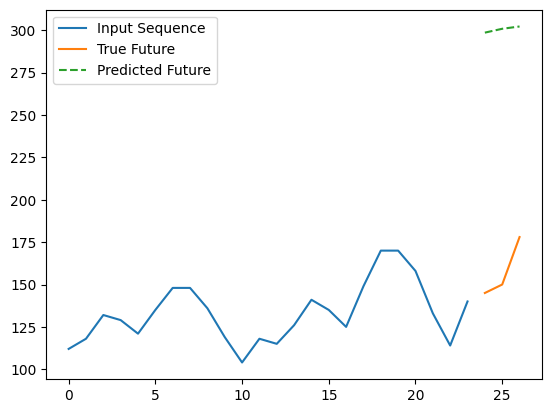

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def create_data(x, y, time_step = 3):
    X = []
    Y = []
    for i in range((len(y)-24-time_step)):
        X.append(y[i:i+24])
        Y.append(y[i+24:i+24+time_step])
    return np.array(X), np.array(Y)

x = flights.iloc[:,:2]
y = flights.iloc[:,2]
X, Y = create_data(x, y)

X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # (samples, timesteps, features)
Y = torch.tensor(Y, dtype=torch.float32)

# LSTMモデル
class LSTMModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=24, num_layers=2, output_dim=3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # 最後のステップの出力を使う
        return out

# モデル初期化
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.3)

# 学習
for epoch in range(150):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

# 予測
with torch.no_grad():
    pred = model(X[:1]).numpy()

# 結果表示
plt.plot(range(24), X[0].numpy().flatten(), label="Input Sequence")
plt.plot(range(24, 27), Y[0].numpy(), label="True Future")
plt.plot(range(24, 27), pred.flatten(), label="Predicted Future", linestyle='dashed')
plt.legend()
plt.show()
